### **1. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

plt.style.use("seaborn-v0_8")

### **2. Load Data**

This workbook contains three sheets:

- Student_Master
- Lecture_List (ignored for now)
- Attendance_Database (main analysis sheet)

**Setting the File Path**

Using structured project paths via pathlib.

In [2]:
from pathlib import Path

# Get project root (one level above notebooks/)
PROJECT_ROOT = Path().resolve().parent

# Define data directory
DATA_DIR = PROJECT_ROOT / "data"

# Define file path
file_path = DATA_DIR / "Dummy_Data.xlsm"

print("Project Root:", PROJECT_ROOT)
print("File Path:", file_path)

Project Root: C:\Users\DELL\Desktop\Tanmay\End Sem PBL\end-sem-practical-pbl\Analysis
File Path: C:\Users\DELL\Desktop\Tanmay\End Sem PBL\end-sem-practical-pbl\Analysis\data\Dummy_Data.xlsm


**Reading the required sheet**

In [3]:
student_master = pd.read_excel(
    file_path,
    sheet_name="Students_Master",
    engine="openpyxl"
)

attendance_df = pd.read_excel(
    file_path,
    sheet_name="Attendance_Database",
    engine="openpyxl"
)

from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path().resolve().parent
DATA_DIR = PROJECT_ROOT / "data"
file_path = DATA_DIR / "Dummy_Data.xlsm"

attendance_df = pd.read_excel(
    file_path,
    sheet_name="Attendance_Database",
    engine="openpyxl"
)

### 3. **Data Inspection & Validation**

Initial structural checks before cleaning and analysis.

In [4]:
attendance_df.head()

,Date,Time,Batch,PRN,Name,Present
0,24/2/2026,09:30:00,D1,2501132001,Patil Yoksh Laxman,0
1,24/2/2026,09:30:00,D1,2501132002,Uttekar Paarth Hanumant,0
2,24/2/2026,09:30:00,D1,2501132003,Gupta Aastha Vijay,1
3,24/2/2026,09:30:00,D1,2501132004,Satvik Anand,0
4,24/2/2026,09:30:00,D1,2501132011,Gupta Mannat Sameer,1


In [5]:
attendance_df.columns

Index(['Date', 'Time', 'Batch', 'PRN', 'Name', 'Present'], dtype='str')

In [6]:
attendance_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     1041 non-null   object
 1   Time     1041 non-null   object
 2   Batch    1041 non-null   str   
 3   PRN      1041 non-null   int64 
 4   Name     1041 non-null   str   
 5   Present  1041 non-null   int64 
dtypes: int64(2), object(2), str(2)
memory usage: 48.9+ KB


In [7]:
attendance_df.isna().sum()

Date       0
Time       0
Batch      0
PRN        0
Name       0
Present    0
dtype: int64

In [8]:
attendance_df["Present"].value_counts()

Present
1    525
0    516
Name: count, dtype: int64

### **4. Data Cleaning & Type Standardization**

Converting columns to correct data types and ensuring structural consistency.

In [9]:
# Removing the leading and trailing spaces
attendance_df.columns = attendance_df.columns.str.strip()
attendance_df.columns

Index(['Date', 'Time', 'Batch', 'PRN', 'Name', 'Present'], dtype='str')

In [10]:
# Converting the Date Column

attendance_df['Date'] = pd.to_datetime(
    attendance_df['Date'],
    errors="coerce"
) 

attendance_df['Date'].dtype

C:\Users\DELL\AppData\Local\Temp\ipykernel_19052\3318372730.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  attendance_df['Date'] = pd.to_datetime(


dtype('<M8[us]')

*Resolving Time Issue*

In [11]:
print("Dtype:", attendance_df["Time"].dtype)
print("\nFirst 10 values:")
print(attendance_df["Time"].head(10))

print("\nUnique sample:")
print(attendance_df["Time"].unique()[:10])

Dtype: object

First 10 values:
0    09:30:00
1    09:30:00
2    09:30:00
3    09:30:00
4    09:30:00
5    09:30:00
6    09:30:00
7    09:30:00
8    09:30:00
9    09:30:00
Name: Time, dtype: object

Unique sample:
[datetime.time(9, 30) datetime.time(11, 0) datetime.time(2, 0)
 datetime.time(10, 0) datetime.time(1, 30) datetime.time(9, 0)
 datetime.time(11, 30) datetime.time(2, 30) datetime.time(12, 0)
 datetime.time(10, 30)]


In [12]:
# Converting the Time Column

print("Before conversion : ",attendance_df["Time"].dtype)

attendance_df["Time"] = pd.to_datetime(
    attendance_df["Time"].astype(str),
    format="%H:%M:%S"
)

print("Head : ",attendance_df["Time"].head())
print("Dtype : ",attendance_df["Time"].dtype)

Before conversion :  object
Head :  0   1900-01-01 09:30:00
1   1900-01-01 09:30:00
2   1900-01-01 09:30:00
3   1900-01-01 09:30:00
4   1900-01-01 09:30:00
Name: Time, dtype: datetime64[us]
Dtype :  datetime64[us]


In [13]:
# Ensuring the attendance is only 0 and 1

attendance_df["Present"] = pd.to_numeric(
    attendance_df['Present'],
    errors="coerce"
)

attendance_df['Present'].dtype

dtype('int64')

In [14]:
# Making the PRN as String cause sometimes excel convert them into scientific number

attendance_df["PRN"] = attendance_df["PRN"].astype(str)
attendance_df["PRN"].head()

0    2501132001
1    2501132002
2    2501132003
3    2501132004
4    2501132011
Name: PRN, dtype: str

*Cleaning Date and Time together*

In [15]:
# Combine Date and Time into single DateTime column
attendance_df['DateTime'] = pd.to_datetime(
    attendance_df['Date'].dt.strftime('%Y-%m-%d') + ' ' +
    attendance_df['Time'].dt.strftime('%H:%M:%S')
)

# Drop original Date and Time column (safe to remove)
attendance_df.drop(columns=['Date', 'Time'], inplace=True)

attendance_df.head()

,Batch,PRN,Name,Present,DateTime
0,D1,2501132001,Patil Yoksh Laxman,0,2026-02-24 09:30:00
1,D1,2501132002,Uttekar Paarth Hanumant,0,2026-02-24 09:30:00
2,D1,2501132003,Gupta Aastha Vijay,1,2026-02-24 09:30:00
3,D1,2501132004,Satvik Anand,0,2026-02-24 09:30:00
4,D1,2501132011,Gupta Mannat Sameer,1,2026-02-24 09:30:00


*Output after Cleaning and Transforming*

In [16]:
print("After Cleaning and Transforming Entire Data : ")
print("First 5 columns : \n",attendance_df.head())
print("Data Types : \n",attendance_df.dtypes)
print("Information : \n",attendance_df.info())

After Cleaning and Transforming Entire Data : 
First 5 columns : 
   Batch         PRN                     Name  Present            DateTime
0    D1  2501132001       Patil Yoksh Laxman        0 2026-02-24 09:30:00
1    D1  2501132002  Uttekar Paarth Hanumant        0 2026-02-24 09:30:00
2    D1  2501132003       Gupta Aastha Vijay        1 2026-02-24 09:30:00
3    D1  2501132004             Satvik Anand        0 2026-02-24 09:30:00
4    D1  2501132011      Gupta Mannat Sameer        1 2026-02-24 09:30:00
Data Types : 
 Batch                  str
PRN                    str
Name                   str
Present              int64
DateTime    datetime64[us]
dtype: object
<class 'pandas.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Batch     1041 non-null   str           
 1   PRN       1041 non-null   str           
 2   Name      1041 non-null   str           


### **Exploratory Data Analysis (EDA)**

**1. Dataset Overview**

In this section, we examine:
- Total records
- Unique students
- Unique lecture dates
- Unique lecture time slots

In [17]:
print("Total Record : ",attendance_df.shape[0])
print("Total Columns : ",attendance_df.shape[1])
print("\nUnique Students : ",attendance_df["PRN"].nunique())
print("Unique Lecture : ",attendance_df["DateTime"].nunique())
print("Unique Batches : ",attendance_df["Batch"].nunique())

Total Record :  1041
Total Columns :  5

Unique Students :  63
Unique Lecture :  25
Unique Batches :  3


**2. Overall Attendance Analysis**

We calculate:
- Total Present
- Total Absent
- Overall Attendance Percentage

In [18]:
total_present = attendance_df["Present"].sum()
total_records = len(attendance_df)
attendance_percentage = (total_present/total_records)/100
print("Total Present:", total_present)
print("Total Absent:", total_records - total_present)
print("Overall Attendance Percentage: {:.2f}%".format(attendance_percentage))

Total Present: 525
Total Absent: 516
Overall Attendance Percentage: 0.01%


**3. Attendance by Date**

This analysis shows attendance percentage for each lecture date.

In [19]:
attendance_by_date = (
    attendance_df
    .groupby(attendance_df["DateTime"].dt.date)["Present"]
    .mean() *100
)
attendance_by_date = attendance_by_date.sort_index()

attendance_by_date

DateTime
2026-01-03    48.387097
2026-02-03    55.555556
2026-02-24    49.206349
2026-02-25    47.916667
2026-02-26    48.387097
2026-02-27    55.555556
2026-02-28    50.000000
2026-03-03    43.750000
2026-04-03    50.537634
2026-05-03    41.269841
2026-06-03    55.208333
2026-07-03    58.064516
2026-08-03    54.545455
Name: Present, dtype: float64

<Axes: title={'center': 'Attendance Percentage by Date'}, xlabel='DateTime'>

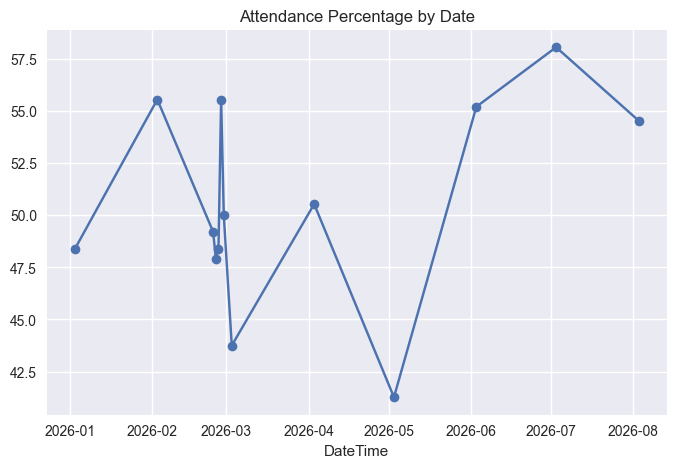

In [20]:
attendance_by_date.plot(marker="o", figsize=(8,5), title="Attendance Percentage by Date")

**4. Attendance by Lecture Time**

We analyze attendance distribution based on lecture timing.

In [21]:
attendance_by_time = (
    attendance_df
    .groupby(attendance_df['DateTime'].dt.strftime('%H:%M'))['Present']
    .mean() *100
)
attendance_by_time = attendance_by_time.sort_index()
attendance_by_time

DateTime
01:00    53.333333
01:30    51.041667
02:00    46.875000
02:30    51.515152
09:00    51.587302
09:30    49.056604
10:00    52.150538
10:30    56.060606
11:00    49.206349
11:30    53.333333
12:00    49.206349
12:30    40.000000
Name: Present, dtype: float64

<Axes: title={'center': 'Attendance Percentage by Lecture Hour'}, xlabel='DateTime'>

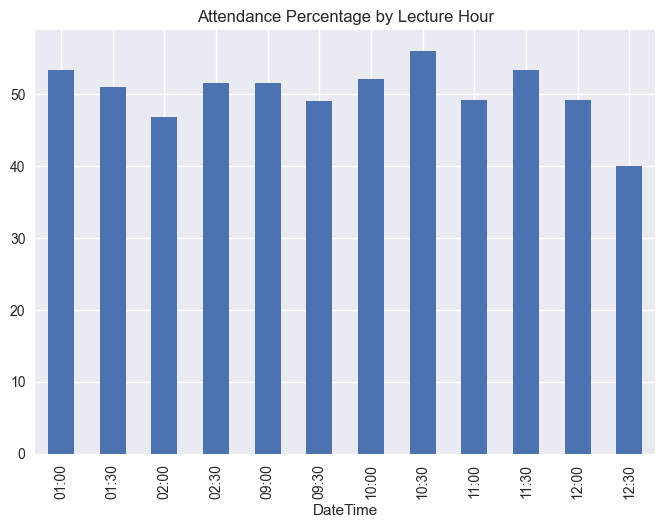

In [22]:
attendance_by_time.plot(kind="bar", title="Attendance Percentage by Lecture Hour")

**5. Student-wise Attendance Analysis**

This section identifies students with low and high attendance percentages.

In [23]:
student_attendance = (
    attendance_df
    .groupby(["PRN","Name"])["Present"]
    .mean() *100
)

student_attendance = student_attendance.sort_values()

student_attendance


PRN         Name                      
2501132015  Shetty Savar Satish           23.529412
2501132011  Gupta Mannat Sameer           29.411765
2501132066  Dahikar Aryan Rajesh          29.411765
2501132117  Atharva Madhav Morbale        31.250000
2501132124  Kohli Bineet                  31.250000
                                            ...    
2501132121  Gopale Ashutosh Ramdas        68.750000
2501132001  Patil Yoksh Laxman            70.588235
2501132076  Kulthe Chinmay Lakshmikant    70.588235
2501132003  Gupta Aastha Vijay            70.588235
2501132016  Shruti Ashish Mahajan         76.470588
Name: Present, Length: 63, dtype: float64

**6. Batch-wise Attendance Analysis**

This analysis compares attendance performance across batches.

In [24]:
batch_attendance = (
    attendance_df
    .groupby('Batch')['Present']
    .mean() * 100
)

batch_attendance = batch_attendance.sort_values()

print(batch_attendance)

Batch
BOTH    49.801587
D2      50.000000
D1      51.851852
Name: Present, dtype: float64


### **Advance Insight Layer**

**Student Attendance Master Table**

Compute attendance percentage relative to total lectures conducted for each student's batch.

In [25]:
# Total lectures per batch (safe agg syntax)
batch_lecture_count = (
    attendance_df
    .groupby('Batch')
    .agg(Total_Lectures_Batch=('DateTime', 'nunique'))
    .reset_index()
)

print("Batch Lecture Count : \n",batch_lecture_count)

# Lectures attended per student
student_attendance_count = (
    attendance_df
    .groupby(['PRN', 'Name', 'Batch'])
    .agg(Lectures_Attended=('Present', 'sum'))
    .reset_index()
)

print("\nStudent Attendance Count : \n",student_attendance_count)

# Merge
student_summary = student_attendance_count.merge(
    batch_lecture_count,
    on='Batch',
    how='left',
    validate='many_to_one'
)

# Correct Attendance %
student_summary['Attendance_Percentage'] = (
    student_summary['Lectures_Attended'] /
    student_summary['Total_Lectures_Batch']
) * 100

print("\nStudent Summary : \n",student_summary)

Batch Lecture Count : 
   Batch  Total_Lectures_Batch
0  BOTH                     8
1    D1                     9
2    D2                     8

Student Attendance Count : 
             PRN                     Name Batch  Lectures_Attended
0    2501132001       Patil Yoksh Laxman  BOTH                  5
1    2501132001       Patil Yoksh Laxman    D1                  7
2    2501132002  Uttekar Paarth Hanumant  BOTH                  4
3    2501132002  Uttekar Paarth Hanumant    D1                  2
4    2501132003       Gupta Aastha Vijay  BOTH                  7
..          ...                      ...   ...                ...
121  2501132133             Shivam Kodag    D2                  5
122  2501132134   Soham Rajendra Bhosale  BOTH                  4
123  2501132134   Soham Rajendra Bhosale    D2                  5
124  2501132135        Nikam Kabeer Atul  BOTH                  5
125  2501132135        Nikam Kabeer Atul    D2                  4

[126 rows x 4 columns]

Student S

**1. Net Student Attendance (Across All Batches)**

Compute consolidated attendance percentage per student 
by aggregating across all batches they belong to.

In [26]:
student_overall_summary = (
    student_summary
    .groupby(['PRN', 'Name'])
    .agg({
        'Lectures_Attended': 'sum',
        'Total_Lectures_Batch': 'sum'
    })
    .reset_index()
)

student_overall_summary['Net_Attendance_Percentage'] = (
    student_overall_summary['Lectures_Attended'] /
    student_overall_summary['Total_Lectures_Batch']
) * 100

student_overall_summary

,PRN,Name,Lectures_Attended,Total_Lectures_Batch,Net_Attendance_Percentage
0,2501132001,Patil Yoksh Laxman,12,17,70.588235
1,2501132002,Uttekar Paarth Hanumant,6,17,35.294118
2,2501132003,Gupta Aastha Vijay,12,17,70.588235
3,2501132004,Satvik Anand,11,17,64.705882
4,2501132011,Gupta Mannat Sameer,5,17,29.411765
...,...,...,...,...,...
58,2501132131,Kisan Babulal Choudhary,8,16,50.000000
59,2501132132,Ravi Raj,8,16,50.000000
60,2501132133,Shivam Kodag,7,16,43.750000
61,2501132134,Soham Rajendra Bhosale,9,16,56.250000


**2. Student Attendance Classification**

Categorize students based on attendance percentage.

In [27]:
def classify_attendance(x):
    if x >= 75:
        return "Safe"
    elif x >= 50:
        return "Warning"
    else:
        return "Critical"

student_overall_summary['Category'] = (
    student_overall_summary['Net_Attendance_Percentage']
    .apply(classify_attendance)
)
student_overall_summary

,PRN,Name,Lectures_Attended,Total_Lectures_Batch,Net_Attendance_Percentage,Category
0,2501132001,Patil Yoksh Laxman,12,17,70.588235,Warning
1,2501132002,Uttekar Paarth Hanumant,6,17,35.294118,Critical
2,2501132003,Gupta Aastha Vijay,12,17,70.588235,Warning
3,2501132004,Satvik Anand,11,17,64.705882,Warning
4,2501132011,Gupta Mannat Sameer,5,17,29.411765,Critical
...,...,...,...,...,...,...
58,2501132131,Kisan Babulal Choudhary,8,16,50.000000,Warning
59,2501132132,Ravi Raj,8,16,50.000000,Warning
60,2501132133,Shivam Kodag,7,16,43.750000,Critical
61,2501132134,Soham Rajendra Bhosale,9,16,56.250000,Warning


**3. Top and Bottom Performer**

In [28]:
print("Bottom 10 students : ")
print(student_overall_summary.sort_values(
    'Net_Attendance_Percentage'
).head(10))
print('\n')
print("Top 10 students : ")
print(student_overall_summary.sort_values(
    'Net_Attendance_Percentage',
    ascending=False
).head(10))

Bottom 10 students : 
           PRN                     Name  Lectures_Attended  Total_Lectures_Batch  Net_Attendance_Percentage  Category
5   2501132015      Shetty Savar Satish                  4                    17                  23.529412  Critical
4   2501132011      Gupta Mannat Sameer                  5                    17                  29.411765  Critical
26  2501132066     Dahikar Aryan Rajesh                  5                    17                  29.411765  Critical
47  2501132117   Atharva Madhav Morbale                  5                    16                  31.250000  Critical
52  2501132124             Kohli Bineet                  5                    16                  31.250000  Critical
56  2501132129    Dhamale Saee Rajendra                  5                    16                  31.250000  Critical
21  2501132059     Yashasvi Reddy Konda                  6                    17                  35.294118  Critical
1   2501132002  Uttekar Paarth Han

**4. Attendance Distribution**

Understanding spread of student attendance percentages.

In [29]:
student_overall_summary['Net_Attendance_Percentage'].describe()

count    63.000000
mean     50.414332
std      11.885552
min      23.529412
25%      42.463235
50%      52.941176
75%      58.823529
max      76.470588
Name: Net_Attendance_Percentage, dtype: float64

**5. Risk Summary**

How many lectures has each student attended vs total lectures?

In [30]:
student_overall_summary['Category'].value_counts()

Category
Warning     35
Critical    27
Safe         1
Name: count, dtype: int64

### **Student Analytics Engine**

**Objective :**
- Convert descriptive attendance metrics into actionable decision variables for:
- Teacher dashboard
- Student performance tracking
- Automated risk alerts
- Future deployment pipeline

**Approach :**
We will construct a student_analytics_table containing:
- attendance_percentage
- performance_score
- consistency_score
- risk_category
- early_warning_flag

**Base Analytics Table**

In [31]:
#creating analytic table
student_analytics_table = student_overall_summary.copy()
student_analytics_table

,PRN,Name,Lectures_Attended,Total_Lectures_Batch,Net_Attendance_Percentage,Category
0,2501132001,Patil Yoksh Laxman,12,17,70.588235,Warning
1,2501132002,Uttekar Paarth Hanumant,6,17,35.294118,Critical
2,2501132003,Gupta Aastha Vijay,12,17,70.588235,Warning
3,2501132004,Satvik Anand,11,17,64.705882,Warning
4,2501132011,Gupta Mannat Sameer,5,17,29.411765,Critical
...,...,...,...,...,...,...
58,2501132131,Kisan Babulal Choudhary,8,16,50.000000,Warning
59,2501132132,Ravi Raj,8,16,50.000000,Warning
60,2501132133,Shivam Kodag,7,16,43.750000,Critical
61,2501132134,Soham Rajendra Bhosale,9,16,56.250000,Warning


**Renaming Category for Clarity**

In [32]:
student_analytics_table = student_analytics_table.rename(
    columns={'Category': 'risk_category'}
)
student_analytics_table

,PRN,Name,Lectures_Attended,Total_Lectures_Batch,Net_Attendance_Percentage,risk_category
0,2501132001,Patil Yoksh Laxman,12,17,70.588235,Warning
1,2501132002,Uttekar Paarth Hanumant,6,17,35.294118,Critical
2,2501132003,Gupta Aastha Vijay,12,17,70.588235,Warning
3,2501132004,Satvik Anand,11,17,64.705882,Warning
4,2501132011,Gupta Mannat Sameer,5,17,29.411765,Critical
...,...,...,...,...,...,...
58,2501132131,Kisan Babulal Choudhary,8,16,50.000000,Warning
59,2501132132,Ravi Raj,8,16,50.000000,Warning
60,2501132133,Shivam Kodag,7,16,43.750000,Critical
61,2501132134,Soham Rajendra Bhosale,9,16,56.250000,Warning


**Performance Score (Standardized Metric)**

Even though attendance % exists, dashboards benefit from normalized scoring (0–1 scale).

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

student_analytics_table['performance_score'] = scaler.fit_transform(
    student_analytics_table[['Net_Attendance_Percentage']]
)
student_analytics_table


,PRN,Name,Lectures_Attended,Total_Lectures_Batch,Net_Attendance_Percentage,risk_category,performance_score
0,2501132001,Patil Yoksh Laxman,12,17,70.588235,Warning,0.888889
1,2501132002,Uttekar Paarth Hanumant,6,17,35.294118,Critical,0.222222
2,2501132003,Gupta Aastha Vijay,12,17,70.588235,Warning,0.888889
3,2501132004,Satvik Anand,11,17,64.705882,Warning,0.777778
4,2501132011,Gupta Mannat Sameer,5,17,29.411765,Critical,0.111111
...,...,...,...,...,...,...,...
58,2501132131,Kisan Babulal Choudhary,8,16,50.000000,Warning,0.500000
59,2501132132,Ravi Raj,8,16,50.000000,Warning,0.500000
60,2501132133,Shivam Kodag,7,16,43.750000,Critical,0.381944
61,2501132134,Soham Rajendra Bhosale,9,16,56.250000,Warning,0.618056


### **Dashboard Analytics & KPI Layer**

**Objective** : Transform the student-level analytics table into aggregated metrics suitable for:
- Teacher dashboard overview
- Risk distribution visualization
- Performance monitoring
- Administrative insights

**Outputs Generated:**
1. Risk Distribution Summary
2. Risk Percentage Breakdown
3. Overall Attendance KPI
4. Top Performers Table
5. Critical Students Alert Table

**Risk Distribution Summary**

This shows:
- How many students are Safe
- How many Warning
- How many Critical

This becomes:
- Pie chart
- Bar chart
- Risk summary widget

In [35]:
risk_distribution = (
    student_analytics_table['risk_category']
    .value_counts()
    .reset_index()
)

risk_distribution.columns = ['risk_category','student_count']

risk_distribution

,risk_category,student_count
0,Warning,35
1,Critical,27
2,Safe,1


**Risk Percentage Breakdown**

Absolute counts are not enough.
We calculate proportions.

In [36]:
risk_distribution['percentage'] = (
    risk_distribution['student_count'] /
    risk_distribution['student_count'].sum()
)*100
risk_distribution

,risk_category,student_count,percentage
0,Warning,35,55.555556
1,Critical,27,42.857143
2,Safe,1,1.587302


**Overall KPI Indicators**

Single metric for dashboard indicator

In [41]:
overall_attendance_kpi = (
    student_analytics_table['Net_Attendance_Percentage']
    .mean()
)
overall_attendance_kpi

np.float64(50.41433239962652)

**Top Performers Table**

For getting best students attendance

In [43]:
no_of_performer = 5
top_performers = (
    student_analytics_table
    .sort_values(by = 'Net_Attendance_Percentage',ascending=False)
    .head(no_of_performer)
)
top_performers

,PRN,Name,Lectures_Attended,Total_Lectures_Batch,Net_Attendance_Percentage,risk_category,performance_score
6,2501132016,Shruti Ashish Mahajan,13,17,76.470588,Safe,1.000000
2,2501132003,Gupta Aastha Vijay,12,17,70.588235,Warning,0.888889
0,2501132001,Patil Yoksh Laxman,12,17,70.588235,Warning,0.888889
32,2501132076,Kulthe Chinmay Lakshmikant,12,17,70.588235,Warning,0.888889
50,2501132121,Gopale Ashutosh Ramdas,11,16,68.750000,Warning,0.854167


**Critical Student Table**

For getting worst students attendance

This becomes:
- Email trigger source
- Weekly report source
- Automated alert list

In [48]:
critical_student = (
    student_analytics_table[
        student_analytics_table['risk_category'] == 'Critical'
    ]
    .sort_values(by='Net_Attendance_Percentage')
)
critical_student

,PRN,Name,Lectures_Attended,Total_Lectures_Batch,Net_Attendance_Percentage,risk_category,performance_score
5,2501132015,Shetty Savar Satish,4,17,23.529412,Critical,0.000000
4,2501132011,Gupta Mannat Sameer,5,17,29.411765,Critical,0.111111
26,2501132066,Dahikar Aryan Rajesh,5,17,29.411765,Critical,0.111111
47,2501132117,Atharva Madhav Morbale,5,16,31.250000,Critical,0.145833
52,2501132124,Kohli Bineet,5,16,31.250000,Critical,0.145833
56,2501132129,Dhamale Saee Rajendra,5,16,31.250000,Critical,0.145833
21,2501132059,Yashasvi Reddy Konda,6,17,35.294118,Critical,0.222222
1,2501132002,Uttekar Paarth Hanumant,6,17,35.294118,Critical,0.222222
13,2501132043,Kolhe Advait Sagar,6,17,35.294118,Critical,0.222222
54,2501132126,Shreya Gupta,6,16,37.500000,Critical,0.263889
